### Looking at precipitation anomalies and regression analysis

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
import Ngl
import Nio
import fiona

In [2]:
DS=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/resampled/all_merra_precip_6hourly_7-12.nc')
print(DS)
precip=DS.PRECTOTCORR
print(precip)
ts_1_prcp=DS.time
data_lat_precip=DS.lat.values
data_lon_precip=DS.lon.values
nlats_precip=len(data_lat_precip)
nlons_precip=len(data_lon_precip)

<xarray.Dataset>
Dimensions:      (lat: 55, lon: 107, time: 60996)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon          (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat          (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 ...
<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
[358961460 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0


In [3]:
precip_hrly_groups=precip.groupby('time.hour')
precip_hrly_groups

DataArrayGroupBy, grouped over 'hour'
4 groups with labels 0, 6, 12, 18.

In [16]:
precip_normal_climo=precip_hrly_groups.mean(dim='time')
precip_normal_climo

<xarray.DataArray 'PRECTOTCORR' (hour: 4, lat: 55, lon: 107)>
array([[[3.9795050e-05, 3.8484650e-05, 3.7942067e-05, ...,
         1.3537599e-04, 1.3124416e-04, 1.3087082e-04],
        [3.6359230e-05, 3.5025030e-05, 3.4474182e-05, ...,
         1.3392180e-04, 1.3100538e-04, 1.2979817e-04],
        [3.4608649e-05, 3.2463307e-05, 3.1470212e-05, ...,
         1.3420907e-04, 1.3190748e-04, 1.3036850e-04],
        ...,
        [3.7398512e-04, 3.5820308e-04, 3.6500496e-04, ...,
         2.2119933e-04, 2.4599765e-04, 2.6363833e-04],
        [4.0675362e-04, 3.9957502e-04, 3.6258946e-04, ...,
         2.0922511e-04, 2.4146881e-04, 2.5485954e-04],
        [3.8884566e-04, 3.0997457e-04, 2.2418180e-04, ...,
         2.1030720e-04, 2.2861107e-04, 2.2599226e-04]],

       [[4.7179619e-05, 4.5289125e-05, 4.5042932e-05, ...,
         1.4302644e-04, 1.3817278e-04, 1.3760832e-04],
        [4.3552776e-05, 4.1802396e-05, 4.1046660e-05, ...,
         1.4117488e-04, 1.3747627e-04, 1.3691151e-04],
        [4.1301671e-05, 3.9353774e-05, 3.8301256e-05, ...,
         1.4080407e-04, 1.3654244e-04, 1.3543289e-04],
...
        [4.0889651e-04, 3.9902699e-04, 4.0166991e-04, ...,
         2.2228608e-04, 2.4156510e-04, 2.5668673e-04],
        [4.3228266e-04, 4.1849236e-04, 3.7797313e-04, ...,
         2.1486152e-04, 2.4170404e-04, 2.5420359e-04],
        [4.0966182e-04, 3.0848256e-04, 2.2691741e-04, ...,
         2.2139565e-04, 2.3850609e-04, 2.3492519e-04]],

       [[3.9053313e-05, 3.6307989e-05, 3.5692203e-05, ...,
         1.4294572e-04, 1.3444740e-04, 1.3390004e-04],
        [3.5152105e-05, 3.2972937e-05, 3.2398024e-05, ...,
         1.4463253e-04, 1.3745684e-04, 1.3591646e-04],
        [3.2422922e-05, 3.0411886e-05, 2.9981098e-05, ...,
         1.4629644e-04, 1.4076266e-04, 1.3813849e-04],
        ...,
        [3.9735175e-04, 3.8589010e-04, 4.0922884e-04, ...,
         2.0862182e-04, 2.3208382e-04, 2.4960068e-04],
        [4.4593122e-04, 4.5292973e-04, 4.2374735e-04, ...,
         1.9709251e-04, 2.2877617e-04, 2.4344363e-04],
        [4.5023925e-04, 3.7240045e-04, 2.6923165e-04, ...,
         2.0129568e-04, 2.2031678e-04, 2.1975291e-04]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * hour     (hour) int64 0 6 12 18

In [18]:
window=3
hours=precip_normal_climo['hour']
for i in hours:
    larger_climo=precip_normal_climo[:,:,:].rolling(hour=window).mean()
print(larger_climo)

<xarray.DataArray 'PRECTOTCORR' (hour: 4, lat: 55, lon: 107)>
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [  

In [19]:
washington_climo_larger=larger_climo.sel(lat=39,lon=-77,method='nearest')
washington_climo_larger

<xarray.DataArray 'PRECTOTCORR' (hour: 4)>
array([       nan,        nan, 0.00021333, 0.00022318], dtype=float32)
Coordinates:
    lon      float64 -76.88
    lat      float64 39.0
  * hour     (hour) int64 0 6 12 18

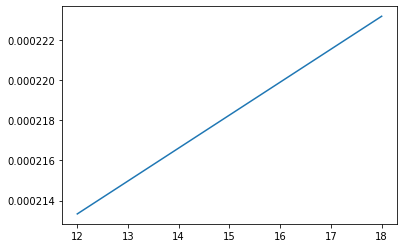

In [21]:
plt.plot(washington_climo_larger['hour'],washington_climo_larger)

In [3]:
precip_climo=precip.groupby('time.hour').mean()
precip_climo

<xarray.DataArray 'PRECTOTCORR' (hour: 4, lat: 55, lon: 107)>
array([[[3.9795050e-05, 3.8484650e-05, 3.7942067e-05, ...,
         1.3537599e-04, 1.3124416e-04, 1.3087082e-04],
        [3.6359230e-05, 3.5025030e-05, 3.4474182e-05, ...,
         1.3392180e-04, 1.3100538e-04, 1.2979817e-04],
        [3.4608649e-05, 3.2463307e-05, 3.1470212e-05, ...,
         1.3420907e-04, 1.3190748e-04, 1.3036850e-04],
        ...,
        [3.7398512e-04, 3.5820308e-04, 3.6500496e-04, ...,
         2.2119933e-04, 2.4599765e-04, 2.6363833e-04],
        [4.0675362e-04, 3.9957502e-04, 3.6258946e-04, ...,
         2.0922511e-04, 2.4146881e-04, 2.5485954e-04],
        [3.8884566e-04, 3.0997457e-04, 2.2418180e-04, ...,
         2.1030720e-04, 2.2861107e-04, 2.2599226e-04]],

       [[4.7179619e-05, 4.5289125e-05, 4.5042932e-05, ...,
         1.4302644e-04, 1.3817278e-04, 1.3760832e-04],
        [4.3552776e-05, 4.1802396e-05, 4.1046660e-05, ...,
         1.4117488e-04, 1.3747627e-04, 1.3691151e-04],
        [4.1301671e-05, 3.9353774e-05, 3.8301256e-05, ...,
         1.4080407e-04, 1.3654244e-04, 1.3543289e-04],
...
        [4.0889651e-04, 3.9902699e-04, 4.0166991e-04, ...,
         2.2228608e-04, 2.4156510e-04, 2.5668673e-04],
        [4.3228266e-04, 4.1849236e-04, 3.7797313e-04, ...,
         2.1486152e-04, 2.4170404e-04, 2.5420359e-04],
        [4.0966182e-04, 3.0848256e-04, 2.2691741e-04, ...,
         2.2139565e-04, 2.3850609e-04, 2.3492519e-04]],

       [[3.9053313e-05, 3.6307989e-05, 3.5692203e-05, ...,
         1.4294572e-04, 1.3444740e-04, 1.3390004e-04],
        [3.5152105e-05, 3.2972937e-05, 3.2398024e-05, ...,
         1.4463253e-04, 1.3745684e-04, 1.3591646e-04],
        [3.2422922e-05, 3.0411886e-05, 2.9981098e-05, ...,
         1.4629644e-04, 1.4076266e-04, 1.3813849e-04],
        ...,
        [3.9735175e-04, 3.8589010e-04, 4.0922884e-04, ...,
         2.0862182e-04, 2.3208382e-04, 2.4960068e-04],
        [4.4593122e-04, 4.5292973e-04, 4.2374735e-04, ...,
         1.9709251e-04, 2.2877617e-04, 2.4344363e-04],
        [4.5023925e-04, 3.7240045e-04, 2.6923165e-04, ...,
         2.0129568e-04, 2.2031678e-04, 2.1975291e-04]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * hour     (hour) int64 0 6 12 18

# washington_climo=precip_climo.sel(lat=39,lon=-77,method='nearest')
plt.plot(washington_climo)

In [4]:
ds_anoms=precip.groupby('time.hour')-precip_climo
ds_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
array([[[-3.97950498e-05, -3.84846498e-05, -3.79420671e-05, ...,
         -7.71496998e-05, -1.09201268e-04, -1.12444606e-04],
        [-3.63592299e-05, -3.50250302e-05, -3.44741820e-05, ...,
         -4.50512744e-05, -1.00733785e-04, -9.32784460e-05],
        [-3.46086490e-05, -3.24633074e-05, -3.14702120e-05, ...,
         -3.35666264e-05, -5.81783970e-05, -8.75898259e-05],
        ...,
        [-2.62312096e-04, -1.22019672e-04,  3.46257264e-04, ...,
         -2.18459609e-04, -2.45266943e-04, -2.62307061e-04],
        [-2.93221092e-05,  2.06052879e-04,  6.22109044e-04, ...,
         -2.08962767e-04, -2.41242567e-04, -2.54553626e-04],
        [ 5.55649516e-04,  2.67981872e-04,  1.48436637e-04, ...,
         -2.09912410e-04, -2.27785407e-04, -2.24201562e-04]],

       [[-4.71796193e-05, -4.52891254e-05, -4.50429325e-05, ...,
          1.23293430e-05, -1.94086606e-05, -3.21528059e-05],
        [-4.35527763e-05, -4.18023956e-05, -4.10466600e-05, ...,
          2.60198722e-05, -3.09907045e-05, -3.09623865e-05],
        [-4.13016714e-05, -3.93537739e-05, -3.83012557e-05, ...,
          4.75354318e-05,  6.71177986e-07, -2.89324234e-05],
...
          4.71858121e-03,  4.15570801e-03,  3.35440109e-03],
        [-1.91248924e-04, -1.42835779e-04, -4.81210300e-05, ...,
          4.89683263e-03,  4.20432584e-03,  3.75265907e-03],
        [ 9.90340195e-05,  5.68194082e-05, -6.99262309e-05, ...,
          4.20412980e-03,  3.72830220e-03,  3.32585629e-03]],

       [[-2.59929111e-05, -2.93885532e-05, -2.96856379e-05, ...,
          2.38315878e-03,  7.52308033e-03,  8.57910700e-03],
        [-3.04645255e-05, -2.85720889e-05, -2.77561958e-05, ...,
          7.05680065e-03,  9.98126622e-03,  9.69598908e-03],
        [-2.98791310e-05, -2.64365353e-05, -2.49426430e-05, ...,
          9.39533394e-03,  1.13152498e-02,  1.38675226e-02],
        ...,
        [-2.81159941e-04, -2.54171289e-04, -2.10238737e-04, ...,
          1.62968441e-04,  2.13017585e-04,  8.53383273e-04],
        [-2.75029801e-04, -1.95176894e-04, -3.10246833e-06, ...,
          1.21342158e-03,  1.43496832e-03,  2.43355008e-03],
        [-7.90066260e-05,  7.45598809e-05, -1.08678651e-05, ...,
          1.87839975e-03,  2.32605333e-03,  3.44056822e-03]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [5]:
ds_anoms_norm=ds_anoms/(ds_anoms.std())
ds_anoms_norm

<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
array([[[-8.33862267e-02, -8.06404252e-02, -7.95035018e-02, ...,
         -1.61658859e-01, -2.28819457e-01, -2.35615522e-01],
        [-7.61868373e-02, -7.33911661e-02, -7.22369232e-02, ...,
         -9.44000773e-02, -2.11076762e-01, -1.95454904e-01],
        [-7.25186843e-02, -6.80233528e-02, -6.59424286e-02, ...,
         -7.03352384e-02, -1.21906544e-01, -1.83535015e-01],
        ...,
        [-5.49646653e-01, -2.55679037e-01,  7.25544681e-01, ...,
         -4.57758504e-01, -5.13930377e-01, -5.49636103e-01],
        [-6.14413113e-02,  4.31761542e-01,  1.30356228e+00, ...,
         -4.37858898e-01, -5.05497732e-01, -5.33389617e-01],
        [ 1.16430352e+00,  5.61527055e-01,  3.11032932e-01, ...,
         -4.39848773e-01, -4.77299707e-01, -4.69790146e-01]],

       [[-9.88597941e-02, -9.48984685e-02, -9.43825978e-02, ...,
          2.58348060e-02, -4.06687510e-02, -6.73727305e-02],
        [-9.12601366e-02, -8.75924029e-02, -8.60088407e-02, ...,
          5.45218305e-02, -6.49376726e-02, -6.48783352e-02],
        [-8.65431896e-02, -8.24615807e-02, -8.02561426e-02, ...,
          9.96053608e-02,  1.40638094e-03, -6.06247670e-02],
...
        [-6.19084055e-01, -6.23655777e-01, -5.15390881e-01, ...,
          9.88727706e+00,  8.70783708e+00,  7.02878503e+00],
        [-4.00741455e-01, -2.99296941e-01, -1.00832418e-01, ...,
          1.02607836e+01,  8.80971050e+00,  7.86329159e+00],
        [ 2.07515087e-01,  1.19058930e-01, -1.46522861e-01, ...,
          8.80929971e+00,  7.81225438e+00,  6.96897247e+00]],

       [[-5.44653365e-02, -6.15805376e-02, -6.22030464e-02, ...,
          4.99365169e+00,  1.57638019e+01,  1.79765917e+01],
        [-6.38351212e-02, -5.98697249e-02, -5.81601090e-02, ...,
          1.47867632e+01,  2.09146648e+01,  2.03168974e+01],
        [-6.26084904e-02, -5.53949031e-02, -5.22646132e-02, ...,
          1.96869070e+01,  2.37098833e+01,  2.90578951e+01],
        ...,
        [-5.89140274e-01, -5.32588472e-01, -4.40532556e-01, ...,
          3.41482758e-01,  4.46355332e-01,  1.78817243e+00],
        [-5.76295229e-01, -4.08972090e-01, -6.50088713e-03, ...,
          2.54259380e+00,  3.00682105e+00,  5.09924123e+00],
        [-1.65549848e-01,  1.56232174e-01, -2.27724369e-02, ...,
          3.93598370e+00,  4.87399341e+00,  7.20933893e+00]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [8]:
washington_anoms=ds_anoms.sel(lat=39,lon=-77,method='nearest')
washington_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 60996)>
array([-0.00018405, -0.00025875, -0.00019712, ..., -0.00025875,
       -0.00019719, -0.00021361], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
    lon      float64 -76.88
    lat      float64 39.0
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [9]:
print(np.nanmin(washington_anoms))
print(np.nanmax(washington_anoms))

-0.00025874714
0.019556062


Text(0.5, 1.0, 'Normalized 6 hourly precipitation anomalies over CONUS')

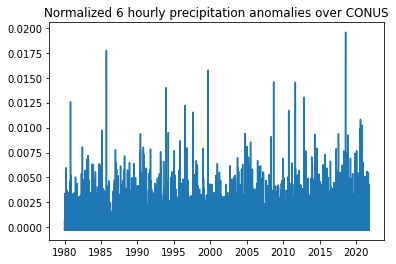

In [10]:
plt.plot(washington_anoms['time'],washington_anoms)
plt.title('Normalized 6 hourly precipitation anomalies over CONUS')

In [12]:
ds_anoms_mean=ds_anoms.mean(dim='time')
ds_anoms_mean

<xarray.DataArray 'PRECTOTCORR' (lat: 55, lon: 107)>
array([[ 2.8464106e-10,  1.7478044e-10,  1.9457956e-10, ...,
         9.7578090e-10, -2.2586817e-10,  1.4424231e-10],
       [ 6.7127255e-11,  2.2472177e-10,  1.7656906e-10, ...,
         5.3695792e-10, -4.7256268e-11,  4.8329651e-10],
       [ 1.8941353e-10,  5.0034227e-11,  7.0834692e-11, ...,
         2.3422009e-11,  5.8848176e-10,  7.4064849e-10],
       ...,
       [ 1.2852384e-09,  1.3982855e-09,  6.3480049e-10, ...,
         1.2313965e-09,  1.4331687e-09,  1.6512983e-09],
       [ 1.9983508e-09,  3.7703002e-10,  1.8655624e-09, ...,
         1.2158450e-09,  1.7726903e-09,  1.2777438e-09],
       [ 1.4025622e-09,  8.3040247e-10,  6.2138583e-10, ...,
         1.4144950e-09,  1.0962576e-09,  6.7719225e-10]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

Text(0.5, 1.0, 'Mean 6 hourly precipitation anomalies over CONUS from 1980-2021')

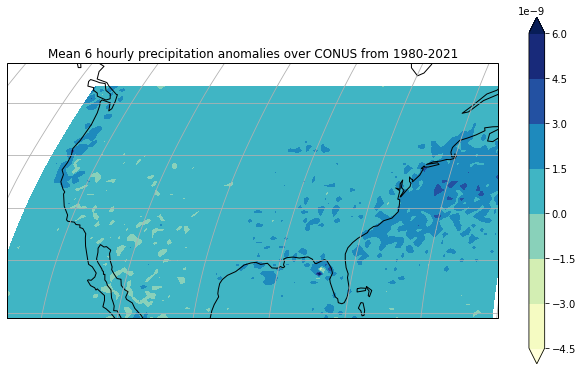

In [19]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(data_lon_precip, data_lat_precip, ds_anoms_mean,transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Mean 6 hourly precipitation anomalies over CONUS from 1980-2021')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/precip_climo')

Text(0.5, 1.0, '6 hourly precipitation anomalies over CONUS for specific year')

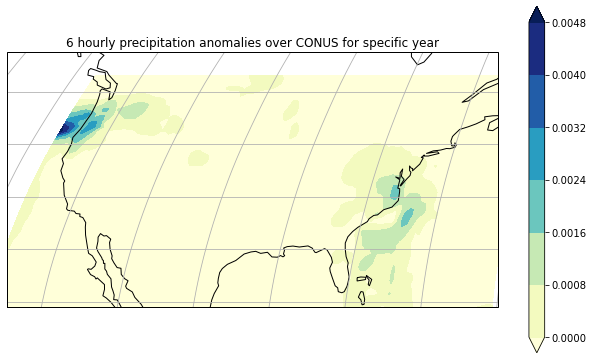

In [21]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(data_lon_precip, data_lat_precip, ds_anoms[15,:,:],transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('6 hourly precipitation anomalies over CONUS for specific year')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/precip_climo')

### Load in vorticity data

In [26]:
DS=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/vort_computed_corrected_8-16.nc')
vort=DS['__xarray_dataarray_variable__']
data_lat_vort=vort['lat']
data_lon_vort=vort['lon']
nlats_vort=len(data_lat_vort)
nlons_vort=len(data_lon_vort)
vort_time=vort['time']

In [34]:
max_lat=39.6063
min_lat=36.3965
max_lon=-75.8085
min_lon=-83.6065
#max_lat=38
#min_lat=36.5
#max_lon=-77
#min_lon=-79

etc_vort=[]
etc_dates_list=[]
time_array=[]
vort_indices=[]
vort_years=np.arange(1980,2022)
for i in vort_years:
    time_oneyear = vort_time.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    vort_each_year=vort.sel(time=slice(str(i)+"-01-01",str(i)+"-12-31")).values
    for k in range(0,nlats_vort):
        for j in range(0,nlons_vort):
             if data_lat_vort[k] <= max_lat and data_lat_vort[k] >= min_lat and data_lon_vort[j] <= max_lon and data_lon_vort[j] >= min_lon:
                vort_of_etc_index=np.asarray(np.where(vort_each_year[:,k,j]>1.0e-5))
                if (vort_of_etc_index.size>0):
                    etc_dates= time_oneyear[np.squeeze(vort_of_etc_index)]
                    etc_dates_list.append(etc_dates)
                    vort_box_mean=np.nanmean(vort_each_year[np.squeeze(vort_of_etc_index),k,j])
                    etc_vort_nonaveraged=vort_each_year[np.squeeze(vort_of_etc_index),k,j]
                    etc_vort.append(etc_vort_nonaveraged)
                    #etc_vort.append(np.nanmean(vort_each_year[np.squeeze(vort_of_etc_index),k,j]),axis=(1,2))

In [35]:
print(np.shape(etc_vort))

(3528,)


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### Regression Analysis

In [28]:
from scipy.stats import linregress


In [36]:
#regression map code
nx=len(ds_anoms['lon'])
ny=len(ds_anoms['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))
m_array=np.zeros((ny,nx))

x=etc_vort

for i in range(nx):
    for j in range(ny):
        y=ds_anoms[:,j,i]

        m,b,r,p,e = linregress(x,y)
        
        m_array[j,i]=m
        r_array[j,i]=r
        p_array[j,i]=p
        

ValueError: operands could not be broadcast together with shapes (317,) (249,) 